# このページには、2010年以降のアカハニュースについて簡単に統計を取ったものが表示されています。

以下のページのにある表``【日本の研究者の性不正・アカハラ事件一覧】``を元に簡単な統計処理をしたものです。

[研究者のセクハラ・アカハラ事件一覧 | 研究者倫理]((https://haklak.com/page_harassment_2.html))

---
# 最初のこの部分はデータ処理をしている所なので読み飛ばしてください。

**スクレイピング**

このページの表``【日本の研究者の性不正・アカハラ事件一覧】``を抽出

[研究者のセクハラ・アカハラ事件一覧 | 研究者倫理](https://haklak.com/page_harassment_2.html)


2010年以降の部分だけ（2010年以前は一部だけみたいなので）

In [87]:
import pandas as pd
import numpy as np
import os
from glob import glob

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

In [3]:
url = f'https://haklak.com/page_harassment_2.html'

# スクレイピング
# urllib.request だと 503 service unavailable が出たので requests.getで
page = requests.get(url)

# パース
soup = BeautifulSoup(page.text, 'html.parser')

In [20]:
# tableを取得
table = soup.find_all("table")[1]

# 各行を取得
rows = table.find_all('tr')

# ここに追加していく
values_ary = []
columns = []

# セルの値を追加していく
for i, row in enumerate(rows):
    
    # 一行目はheader
    if i == 0:
        for cell in row.find_all('th'):
            v = cell.get_text()
            columns.append(v)

    # 2行目以降はcellの値
    else:    
        sub_ary = []
        for cell in row.find_all('td'):
            v = cell.get_text()
            sub_ary.append(v)
        values_ary.append(sub_ary)

df = pd.DataFrame(values_ary, columns=columns)

# 2010年以降を抽出
df = df.iloc[:178, :]

表の最初の2行を表示（どんな表か見るため）

In [22]:
display(df.head(2))

,公表年月日,名前(姓 名) SPACE,性,事件種,被害者 SPACESP,行為内容（文章は出典から修正引用） SPACESPACESPACESPACE,所属機関 SPAC,領域,地位,公表時年齢,職,処分など SPAC,透明性,出典
0,191113,匿名,男,レイプ,20代の女性卒業生1人,酩酊して眠っている状態のときに、同意なく性行為を強いられた,福島大学,？,教授、学類長,50代,✕,なし、自己都合退職,✕,191113田中圭太郎 191114大学
1,191018,匿名,男,セク、ストーキング,女性学生,頭や肩などに触れたり、学会出張時の列車内でひざを触った,山形大学,工,准教授,50代,〇,停職1か月,✕,191018産経


column名表示（後でコピペするため）

In [23]:
print(df.columns.tolist())

['公表年月日', '名前(姓 名) SPACE', '性', '事件種', '被害者 SPACESP', '行為内容（文章は出典から修正引用） SPACESPACESPACESPACE', '所属機関 SPAC', '領域', '地位', '公表時年齢', '職', '処分など SPAC', '透明性', '出典']


# ここまでがデータ処理の部分です。
---
# ここからが統計処理をした後のものです。

# ・表の簡単な統計値を表示

In [24]:
df.describe()

,公表年月日,名前(姓 名) SPACE,性,事件種,被害者 SPACESP,行為内容（文章は出典から修正引用） SPACESPACESPACESPACE,所属機関 SPAC,領域,地位,公表時年齢,職,処分など SPAC,透明性,出典
count,178,178,178,178,178,178,178,178,178,178,178,178,178,178
unique,168,40,5,26,134,168,102,38,25,35,10,102,7,164
top,181109,匿名,男,アカ,複数の学生,２０１０～１２年、,山形大学,？,教授,50代,〇,？,✕,130715北海道
freq,2,139,154,62,6,5,7,43,95,49,127,11,149,5


# ・いくつかの項目について、種類とその出現数を表示

In [25]:
def display_value_counts(name):    
    dff = df[name].value_counts().to_frame()
    dff.columns = ['出現数']
    dff.index.name = '種類'
    dff = dff.reset_index()
    display(dff)

### 性

In [26]:
display_value_counts('性')

,種類,出現数
0,男,154
1,？,11
2,女,9
3,ー,3
4,,1


### 事件種

In [27]:
display_value_counts('事件種')

,種類,出現数
0,アカ,62
1,セク,29
2,性的暴行,22
3,セク、アカ,18
4,ハラ,10
5,アカ、セク,6
6,レイプ,5
7,強制わいせつ,3
8,性的暴行、アカ,3
9,パワ,2


### 所属機関 SPAC

In [28]:
display_value_counts('所属機関 SPAC')

,種類,出現数
0,山形大学,7
1,北海道大学,6
2,早稲田大学,5
3,大阪大学,4
4,九州工業大学,4
5,島根大学,4
6,大阪市立大学,4
7,広島大学,4
8,金沢大学,4
9,九州大学,4


### 地位

In [29]:
display_value_counts('地位')

,種類,出現数
0,教授,95
1,准教授,33
2,教員,8
3,学長,6
4,講師,5
5,助教,5
6,教授ら５人,5
7,医師,2
8,ー,2
9,学部長,2


### 公表時年齢

In [30]:
display_value_counts('公表時年齢')

,種類,出現数
0,50代,49
1,？,41
2,40代,22
3,60代,9
4,30代,7
5,58,4
6,63,3
7,ー,3
8,61,3
9,62,3


# ・公表時年齢 を元に 世代別件数 を計算

In [31]:
# ごみを削除
tmp = df['公表時年齢'].replace({'代': '', '歳': '', '\?': '', '\？': '', 'ー': ''}, regex=True)

# nan はいったん -100 にしておく
tmp = tmp.replace('', '-100')

# 値を世代に変更
tmp = tmp.map(lambda x: int(x) // 10 * 10)

# nanを戻す
tmp = tmp.replace(-100, '不明')

# dfに
tmp = tmp.value_counts().to_frame()

# 表示を整形
tmp.columns = ['件数']
tmp.index.name = '世代'
tmp = tmp.reset_index()

# 表示
tmp

,世代,件数
0,50,62
1,不明,48
2,60,31
3,40,26
4,30,10
5,80,1


# 年別件数

,総件数,アカハラを含むもの,アカハラを含むもの / 総件数
10,10,4,0.40
11,11,5,0.45
12,13,6,0.46
13,16,9,0.56
14,5,1,0.20
15,5,2,0.40
16,11,3,0.27
17,12,6,0.50
18,41,23,0.56
19,54,35,0.65


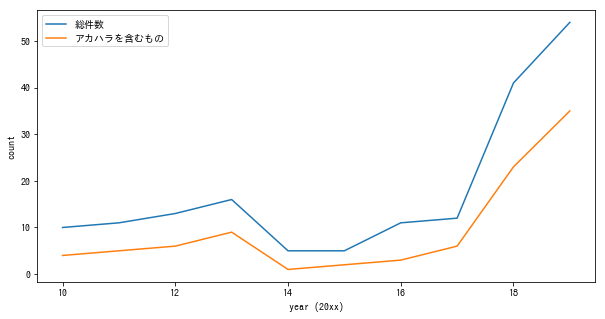

In [88]:
# value_countsを作成
# all: 総件数、 aka: アカハラを含むもの
tmp_all = df['公表年月日'].map(lambda x: int(str(x[0:2]))).value_counts().sort_index().to_frame()
tmp_aka = df.query("事件種.str.contains('アカ')" , engine='python')['公表年月日'].map(lambda x: int(str(x[0:2]))).value_counts().sort_index().to_frame()

# 整形
tmp_all.columns = ['総件数']
tmp_aka.columns = ['アカハラを含むもの']
dff = pd.concat([tmp_all, tmp_aka], axis=1)
dff['アカハラを含むもの / 総件数'] = round(dff['アカハラを含むもの'] / dff['総件数'], 2)
display(dff)

# プロット
plt.figure(figsize=(10,5))
plt.plot(tmp_all, label="総件数")
plt.plot(tmp_aka, label="アカハラを含むもの")
plt.xlabel('year (20xx)')
plt.ylabel('count')
plt.legend()
plt.show()